# Image Classification

## Data Preprocessing

### Import Libraries

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

import numpy as np

torch.__version__, torchvision.__version__

('2.2.0', '0.15.2a0')

### Import and Preprocess Dataset

In [100]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.Resize((224, 224)), # Resize to be 224x224 pixels
    transforms.ToTensor(), # Convert Images to PyTorch Tensors
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]) # Normalize the tensors
])
transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [101]:
# Load the datasets with ImageFolder
train_data = datasets.ImageFolder('./Data/Training/Images', transform=transform)
test_data = datasets.ImageFolder('./Data/Test', transform=transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 2223
     Root location: ./Data/Training/Images
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 570
     Root location: ./Data/Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [102]:
# View First Sample of Training Data
image, label = train_data[0]
image, label

(tensor([[[-1.3987, -1.3815, -1.3473,  ..., -0.7308, -0.6281, -0.4911],
          [-1.3815, -1.3815, -1.3644,  ..., -0.7479, -0.6281, -0.4911],
          [-1.4158, -1.4158, -1.3987,  ..., -0.7308, -0.5938, -0.4568],
          ...,
          [-1.8439, -1.8268, -1.8268,  ..., -1.4158, -1.3987, -1.4158],
          [-1.7754, -1.7754, -1.7583,  ..., -1.4672, -1.4672, -1.4843],
          [-1.7240, -1.7240, -1.7069,  ..., -1.5185, -1.5357, -1.5357]],
 
         [[-1.7906, -1.7731, -1.7556,  ..., -0.7052, -0.5301, -0.3550],
          [-1.7731, -1.7731, -1.7731,  ..., -0.6702, -0.4951, -0.3550],
          [-1.7906, -1.7906, -1.8081,  ..., -0.6352, -0.4601, -0.3200],
          ...,
          [-1.8256, -1.8081, -1.8081,  ..., -1.7556, -1.7731, -1.7731],
          [-1.7556, -1.7556, -1.7381,  ..., -1.7731, -1.7906, -1.8081],
          [-1.7031, -1.7031, -1.6856,  ..., -1.8256, -1.8256, -1.8431]],
 
         [[-1.6302, -1.6127, -1.5953,  ...,  0.4614,  0.7576,  0.9842],
          [-1.6127, -1.6127,

In [103]:
# View Shape of First Training Example
image.shape

torch.Size([3, 224, 224])

In [104]:
# View Names of classes
class_names = train_data.classes
class_names

['Adult',
 'Airplane',
 'Alpaca',
 'Bird',
 'Bus',
 'Car',
 'Cat',
 'Child',
 'Dog',
 'Elephant',
 'Flower',
 'Giraffe',
 'Horse',
 'Monkey',
 'Panda',
 'Reptile',
 'Train',
 'Vessel',
 'Zebra']

### Visualize The Data

In [106]:
# Assuming 'image' is a PyTorch tensor that has been normalized
def denormalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    image = image.numpy().transpose((1, 2, 0))  # Convert from tensor and change to HWC
    mean = np.array(mean)
    std = np.array(std)
    image = std * image + mean  # Apply the inverse of the normalization
    image = np.clip(image, 0, 1)  # Ensure the pixel values are between 0 and 1
    return image

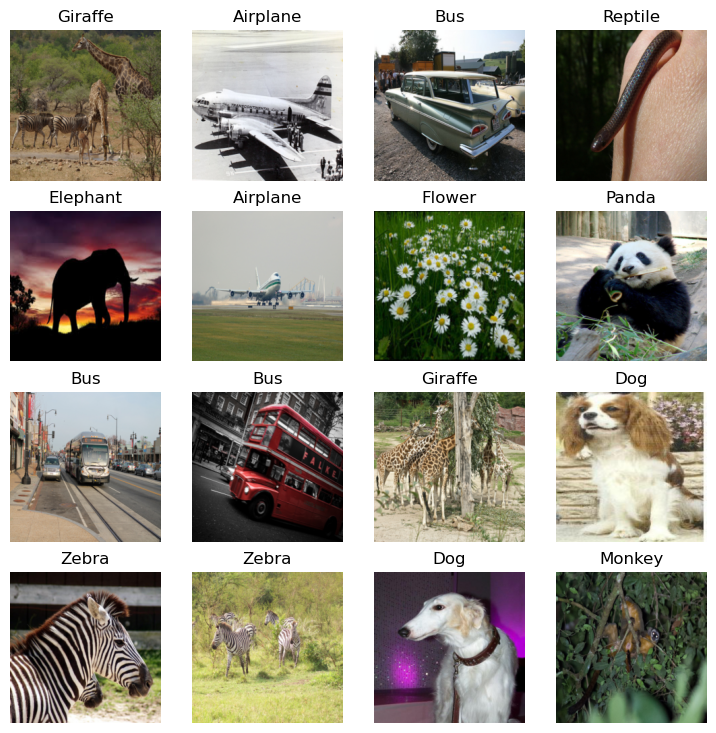

In [107]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    img = denormalize(img)  # Denormalize the image
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis(False)

### Prepare The DataLoader

In [112]:
# Setup the batch size hyperparameter
BATCH_SIZE = 16

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ff7b2780990>, <torch.utils.data.dataloader.DataLoader object at 0x7ff7b27aebd0>)
Length of train dataloader: 139 batches of 16
Length of test dataloader: 36 batches of 16


In [115]:
# View Shape of DataLoader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

## Using Basline Model

In [ ]:
### Building The Basline M

## Using Convolutional Neural Network

## Using ResNet (Residual Networks)

## Using EfficientNet